In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as const
import scipy.integrate as spi
from scipy.misc import derivative
hbar=1
L=5
m=1
def energy1DPIB(n):
    return ((hbar*np.pi*n/L)**2)/(2*m)
def psi1DPIB(x,n):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

In [2]:
def trial1DPIB(x):
    return x*(L-x)
x=sp.symbols('x',real=True)
variationalGrndState = sp.integrate((trial1DPIB(x))*(-hbar**2/(2*m))*sp.diff(sp.diff(trial1DPIB(x),x),x),(x,0,L))/sp.integrate((trial1DPIB(x))**2,(x,0,L))
exactGrndState = energy1DPIB(1)
print("Variational ground state energy:%f, \nExact Ground state energy:%f"%(variationalGrndState,exactGrndState))


Variational ground state energy:0.200000, 
Exact Ground state energy:0.197392


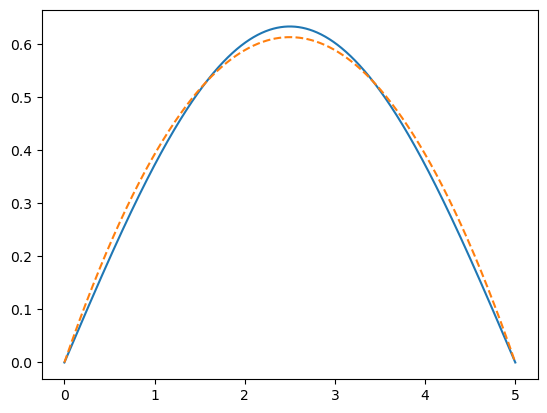

In [3]:
normalisationConst=sp.sqrt(sp.integrate((trial1DPIB(x))**2,(x,0,L)))
x=np.linspace(0,L,1000)
plt.plot(x,psi1DPIB(x,1))
plt.plot(x,trial1DPIB(x)/normalisationConst,linestyle='--')
plt.show()

In [4]:

def trial1DPIB(x,a,b,c,d,e,f):
    return a+b*x+(c*x**2)+(d*x**3)+(e*x**4)+(f*x**5)
def variationalFunction(x,a,b,c,d,e,f):
    X=sp.symbols('X',real=True)
    return trial1DPIB(x,a,b,c,d,e,f)/sp.sqrt(sp.integrate((trial1DPIB(X,a,b,c,d,e,f))**2,(X,0,L)))
def variationalEnergy(a,b,c,d,e,f):
    x=sp.symbols('x',real=True)
    return sp.integrate((trial1DPIB(x,a,b,c,d,e,f))*(-hbar**2/(2*m))*sp.diff(sp.diff(trial1DPIB(x,a,b,c,d,e,f),x),x),(x,0,L))/sp.integrate((trial1DPIB(x,a,b,c,d,e,f))**2,(x,0,L))

In [5]:
variationalEnergy(1,1,1,1,1,1)

-0.441856761136600

In [6]:
import numpy as np
from scipy.optimize import minimize


def objective_function(x):
    return variationalEnergy(x[0],x[1],x[2],x[3],x[4],x[5])

def constraint1(x):
    return variationalFunction(0,x[0],x[1],x[2],x[3],x[4],x[5])

def constraint2(x):
    return variationalFunction(L,x[0],x[1],x[2],x[3],x[4],x[5])

# Initial guess for parameters
initial_guess = [0,L,-1,0,0,0]

# Bounds for the parameters
bounds = [(-30, 30), (-30, 30),(-30, 30),(-30, 30),(-30,30),(-30,30)]

# Constraints
constraints = ({'type': 'eq', 'fun': constraint1},
               {'type': 'eq', 'fun': constraint2})



result = minimize(objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
print(result)



     fun: 0.197395074209316
     jac: array([-2.99806278e-02, -7.46008437e-02, -3.72980280e-01, -1.86556081e+00,
       -9.33060784e+00, -4.66656587e+01])
 message: 'Optimization terminated successfully'
    nfev: 122
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([ 0.00000000e+00,  5.23038189e+00,  1.56867533e-01, -4.84120699e-01,
        4.93981866e-02, -1.38360552e-04])


In [7]:
#Percent error
(result.fun-energy1DPIB(1))*100/energy1DPIB(1)

0.00151282027523738

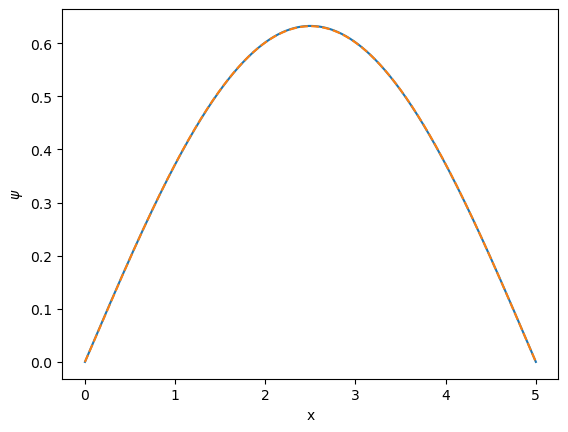

In [8]:
x=np.linspace(0,L,1000)
plt.plot(x,psi1DPIB(x,1))
plt.plot(x,variationalFunction(x,result.x[0],result.x[1],result.x[2],result.x[3],result.x[4],result.x[5]),linestyle='--')
plt.ylabel('$\psi$')
plt.xlabel('x')
plt.show()

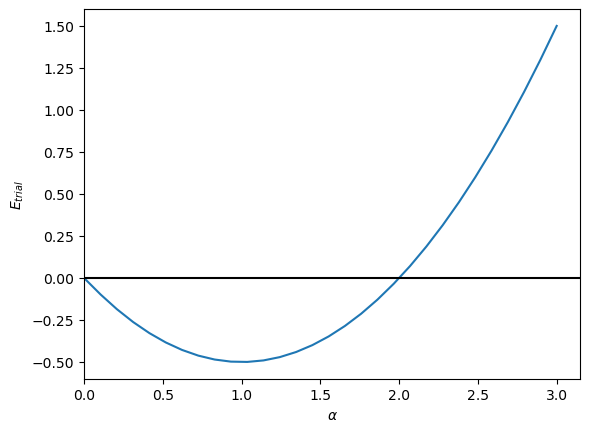

Minima at alpha= 0.9999999626001966 and Minimum energy value: -0.49999999999999933


In [9]:
from scipy.optimize import minimize
mu=1
el=0
Z=1
trialHAtom = lambda r,alpha: np.exp(-alpha*r)
def variationalEnergy(alpha):
    #r=sp.symbols('r',real=True)
    def R(r):
        return sp.exp(-alpha*r)
    x=sp.symbols('x',real=True)
    dR_dr = sp.lambdify(x,sp.diff(R(x),x),'numpy')
    dSqR_drSq = sp.lambdify(x,sp.diff(sp.diff(R(x),x),x),'numpy')
    def integrand1(r):
        return (r*r)*trialHAtom(r,alpha)*((-1/(2*mu))*(dSqR_drSq(r)+(2/r)*dR_dr(r))+(el*(el+1)*(trialHAtom(r,alpha)/(2*mu*mu)))-(Z*trialHAtom(r,alpha)/r))
    def integrand2(r):
            return r*r*(trialHAtom(r,alpha))*(trialHAtom(r,alpha))
    integral1, error1 = spi.quad(integrand1,1e-6,1000)
    integral2, error2 = spi.quad(integrand2,1e-6,1000)
    return integral1/integral2
variational_Energy=[]
alphavals=np.linspace(0.0001,3,30)
for i in alphavals:
    variational_Energy.append(variationalEnergy(i))
plt.plot(alphavals,np.array(variational_Energy))
plt.axhline(y=0,color='black')
plt.xlim(0)
plt.xlabel(r'$\alpha$')
plt.ylabel('$E_{trial}$')
plt.show()
def objective_function(x):
    return variationalEnergy(x[0])
initial_guess = [0]
bounds = [(0.5,1.5)]
result = minimize(objective_function, initial_guess)
print('Minima at alpha=',result.x[0],'and Minimum energy value:',result.fun)


Minima at alpha= 0.28294210117208474 and Minimum energy value: -0.4244131815779089


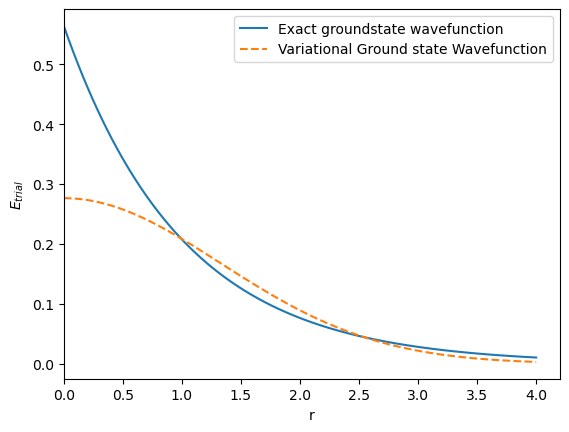

In [10]:
#Gaussian orbitals
from scipy.optimize import minimize
mu=1
el=0
Z=1
trialHAtomGaussian = lambda r,alpha: ((2*alpha/np.pi)**(3/4))*np.exp(-alpha*r*r)
def variationalEnergy(alpha):
    def R(r):
        return ((2*alpha/np.pi)**(3/4))*sp.exp(-alpha*r*r)
    x=sp.symbols('x',real=True)
    dR_dr = sp.lambdify(x,sp.diff(R(x),x),'numpy')
    dSqR_drSq = sp.lambdify(x,sp.diff(sp.diff(R(x),x),x),'numpy')
    def integrand1(r):
        return (r*r)*trialHAtomGaussian(r,alpha)*((-1/(2*mu))*(dSqR_drSq(r)+(2/r)*dR_dr(r))+(el*(el+1)*(trialHAtomGaussian(r,alpha)/(2*mu*mu)))-(Z*trialHAtomGaussian(r,alpha)/r))
    def integrand2(r):
            return r*r*(trialHAtomGaussian(r,alpha))*(trialHAtomGaussian(r,alpha))
    integral1, error1 = spi.quad(integrand1,1e-6,1000)
    integral2, error2 = spi.quad(integrand2,1e-6,1000)
    return integral1/integral2
def objective_function(x):
    return variationalEnergy(x[0])
initial_guess = [0.2]
bounds = [(0.1,0.5)]
result = minimize(objective_function, initial_guess)
print('Minima at alpha=',result.x[0],'and Minimum energy value:',result.fun)
rvals = np.linspace(1e-6,4,100)
plt.plot(rvals,trialHAtom(rvals,1)/np.sqrt(np.pi),label='Exact groundstate wavefunction')
plt.plot(rvals,trialHAtomGaussian(rvals,result.x[0]),linestyle='--',label='Variational Ground state Wavefunction')
plt.legend()
plt.xlabel('r')
plt.ylabel('$E_{trial}$')
plt.xlim(0)
plt.show()




In [24]:
b=0.1
m=1
L=5
nBasis = 2
V = lambda x: b*x
x= sp.symbols('x', real=True)
psi1DPIB= lambda n: (sp.sqrt(2/L) * sp.sin(n * sp.pi * x/L))
hMatr = np.zeros((nBasis, nBasis))
x=sp.symbols('x')
for i in range(nBasis):
    for j in range(nBasis):
        expression = psi1DPIB(i+1)*((-1/(2*m))*sp.diff(sp.diff(psi1DPIB(j+1),x),x)+(V(x))*psi1DPIB(j+1))
        hMatr[i,j]= sp.integrate(expression,(x,0,L))
hMatr

array([[ 0.44739209, -0.09006327],
       [-0.09006327,  1.03956835]])

In [29]:
eigenvalues, eigenvectors = np.linalg.eig(hMatr)
np.sort(eigenvalues)

array([0.43399747, 1.05296297])

In [54]:
c= eigenvectors[eigenvalues==np.sort(eigenvalues)[0]]

In [55]:
np.dot(c[0],c[0])

0.9999999999999998

In [73]:
np.dot(c,(np.dot(hMatr,c.T)))[0][0]

0.4864164987517569

In [75]:
def lowestEval(nBasis):
    hMatr = np.zeros((nBasis, nBasis))
    for i in range(nBasis):
        for j in range(nBasis):
            expression = psi1DPIB(i+1)*((-1/(2*m))*sp.diff(sp.diff(psi1DPIB(j+1),x),x)+(V(x))*psi1DPIB(j+1))
            hMatr[i,j]= sp.integrate(expression,(x,0,L))
    eigenvalues, eigenvectors = np.linalg.eig(hMatr)
    return np.min(eigenvalues)
increasingBasis=[]
for i in range(1,11):
    increasingBasis.append(lowestEval(i))
print(increasingBasis)

[0.44739208802178726, 0.4339974655801364, 0.433867693899852, 0.43384599707975824, 0.43384543369847317, 0.4338448024557973, 0.43384477868615984, 0.43384472114858397, 0.4338447185601431, 0.43384470929762164]


In [82]:
nBasis=5
hMatr = np.zeros((nBasis, nBasis))
for i in range(nBasis):
    for j in range(nBasis):
        expression = psi1DPIB(i+1)*((-1/(2*m))*sp.diff(sp.diff(psi1DPIB(j+1),x),x)+(V(x))*psi1DPIB(j+1))
        hMatr[i,j]= sp.integrate(expression,(x,0,L))
eigenvalues, eigenvectors = np.linalg.eig(hMatr)
c = eigenvectors[eigenvalues==np.sort(eigenvalues)[0]][0]
print(c)

[ 9.88862424e-01  1.48718344e-01 -5.25882587e-03  2.50772902e-03
  1.28159389e-04]


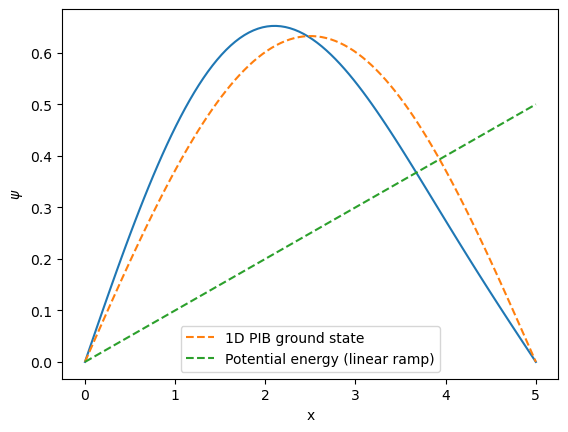

In [98]:
def variationalGroundState(X):
    Sum=0
    for i in range(nBasis):
        Sum+=c[i]*psi1DPIB(i+1)
    return sp.lambdify(x,Sum,'numpy')(X)
X= np.linspace(0,L,100)
plt.plot(X,variationalGroundState(X))
plt.plot(X,sp.lambdify(x,psi1DPIB(1),'numpy')(X),linestyle='--',label='1D PIB ground state')
plt.plot(X,V(X),linestyle='--',label='Potential energy (linear ramp)')
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.show()

In [102]:
#Calculating mean
def integrand(X):
    return variationalGroundState(X)*X*variationalGroundState(X)
integral,error=spi.quad(integrand,0,L)
print("Mean calculated:",integral,"a0")
print("Error:",error,"a0")

Mean calculated: 2.236288456704096 a0
Error: 3.637344286562289e-10 a0


In [107]:
#Calculating mean through matrix operations
xMatr = np.zeros((nBasis, nBasis))
for i in range(nBasis):
    for j in range(nBasis):
        expression = psi1DPIB(i+1)*x*psi1DPIB(j+1)
        xMatr[i,j]= sp.integrate(expression,(x,0,L))
print(xMatr)
print("Mean calculated:",np.dot(c,(np.dot(xMatr,c.T))))

[[ 2.5        -0.90063274  0.         -0.07205062  0.        ]
 [-0.90063274  2.5        -0.97268336  0.         -0.0919013 ]
 [ 0.         -0.97268336  2.5        -0.99253404  0.        ]
 [-0.07205062  0.         -0.99253404  2.5        -1.00070305]
 [ 0.         -0.0919013   0.         -1.00070305  2.5       ]]
Mean calculated: 2.2362884567040964


In [145]:
#Non-orthonormal basis functions
L=5
nBasis=5
basisFn= lambda i: (x**i)*((L**i)-(x**i))
SMatr = np.zeros((nBasis, nBasis))
for i in range(nBasis):
    for j in range(nBasis):
        expression = basisFn(i+1)*basisFn(j+1)
        SMatr[i,j]= sp.integrate(expression,(x,0,L))
print(SMatr)

[[1.04166667e+02 2.04613095e+03 3.79774306e+04 7.18682359e+05
  1.39732501e+07]
 [2.04613095e+03 4.96031746e+04 1.04807844e+06 2.16797092e+07
  4.49938652e+08]
 [3.79774306e+04 1.04807844e+06 2.41457761e+07 5.31745679e+08
  1.15758787e+10]
 [7.18682359e+05 2.16797092e+07 5.31745679e+08 1.22745412e+10
  2.77258699e+11]
 [1.39732501e+07 4.49938652e+08 1.15758787e+10 2.77258699e+11
  6.45071913e+12]]


In [146]:
HMatr = np.zeros((nBasis, nBasis))
for i in range(nBasis):
    for j in range(nBasis):
        expression = basisFn(i+1)*(-1/(2*m))*sp.diff(sp.diff(basisFn(j+1),x),x)
        HMatr[i,j]= sp.integrate(expression,(x,0,L))
print(HMatr)

[[2.08333333e+01 4.16666667e+02 8.37053571e+03 1.73611111e+05
  3.69910038e+06]
 [4.16666667e+02 1.63690476e+04 4.41778274e+05 1.08788781e+07
  2.59648392e+08]
 [8.37053571e+03 4.41778274e+05 1.39825994e+07 3.81860978e+08
  9.80922154e+09]
 [1.73611111e+05 1.08788781e+07 3.81860978e+08 1.12029897e+10
  3.03507211e+11]
 [3.69910038e+06 2.59648392e+08 9.80922154e+09 3.03507211e+11
  8.56474428e+12]]


In [147]:
import scipy
eigenvalues, eigenvectors = scipy.linalg.eig(HMatr,SMatr)
eigenvalues

array([9.05991434+0.j, 0.19739397+0.j, 1.83815765+0.j, 3.47233944+0.j,
       0.79005028+0.j])